In [5]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
host = "http://127.0.0.1:8082"
mac_addresses = []

# A:get all macs
response = requests.get(host+"/devices")
if response.status_code == 200:
    objs=response.json()['mac_addresses']
    for obj in objs:
        mac_addresses.append(obj)
    
else:
    print("The server is offline")
    exit()

In [7]:
print(mac_addresses)
fromtime = 1622505600000
totime   = 1707734538000

['0x86ac561e351', '0xb0a46095b5ff']


for mac_address in mac_addresses:
    request_path = host+"/device/"+ mac_address + f"?fromtime={fromtime}&totime={totime}"
    response = requests.get(request_path)
    mac_address_details_in_string = str(response.content.decode())
    mac_address_details_in_json = json.loads(mac_address_details_in_string)

    mac_address   = mac_address_details_in_json["mac_address"]
    mac_address_x = mac_address_details_in_json["timestamps"]
    mac_address_l = mac_address_details_in_json["labels"]
    
    dictio = {"Datetime": mac_address_x, "Labels":mac_address_l}
    

    df_labels = pd.DataFrame(dictio, columns=['Datetime', 'Labels'])
    df_labels = df_labels.astype({"Datetime": int, "Labels": int})
    df_labels.plot(x='Datetime', y='Labels')
    
    print(df_labels)

In [8]:
df_combined = pd.DataFrame(columns=['Datetime', 'Labels', 'MacAddress'])

for mac_address in mac_addresses:
    request_path = host + "/device/" + mac_address + f"?fromtime={fromtime}&totime={totime}"
    response = requests.get(request_path)
    mac_address_details_in_string = str(response.content.decode())
    mac_address_details_in_json = json.loads(mac_address_details_in_string)

    mac_address_x = mac_address_details_in_json["timestamps"]
    mac_address_l = mac_address_details_in_json["labels"]

    dictio = {"Datetime": mac_address_x, "Labels": mac_address_l, "MacAddress": mac_address}

    df_labels = pd.DataFrame(dictio, columns=['Datetime', 'Labels', 'MacAddress'])
    df_labels = df_labels.astype({"Datetime": int, "Labels": int})

    # Append the current MAC address data to the combined DataFrame
    df_combined = pd.concat([df_combined, df_labels], ignore_index=True)

    #df_combined.plot(x='Datetime', y='Labels')
    
    
#print(df_combined)


import matplotlib.pyplot as plt
import numpy as np

label_names = {
    0.0: 'Change Language',
    1.0: 'Activate Music',
    2.0: 'Deactivate Lights',
    3.0: 'Increase Volume',
    4.0: 'Decrease Volume',
    5.0: 'Increase Heat',
    6.0: 'Decrease Heat',
    7.0: 'Noise'
}

df_combined['Labels'] = df_combined['Labels'].astype(int)
df_combined['Labels'] = df_combined['Labels'].map(label_names)
print(df_combined)

label_counts = df_combined['Labels'].value_counts()

plt.barh(label_counts.index, label_counts.values)

plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.title('Horizontal Histogram of Labels')

plt.show()

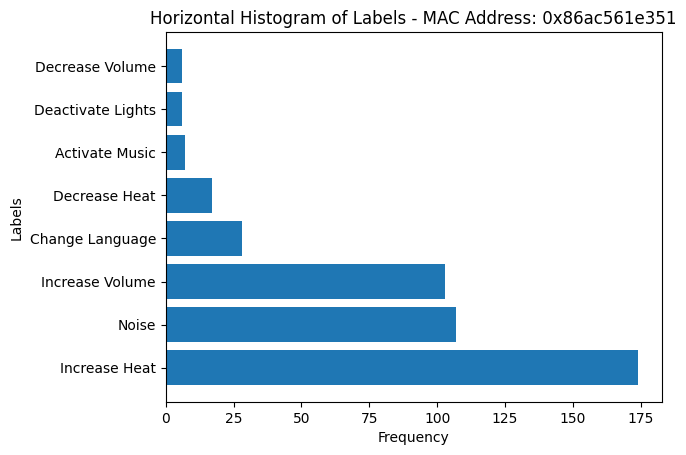

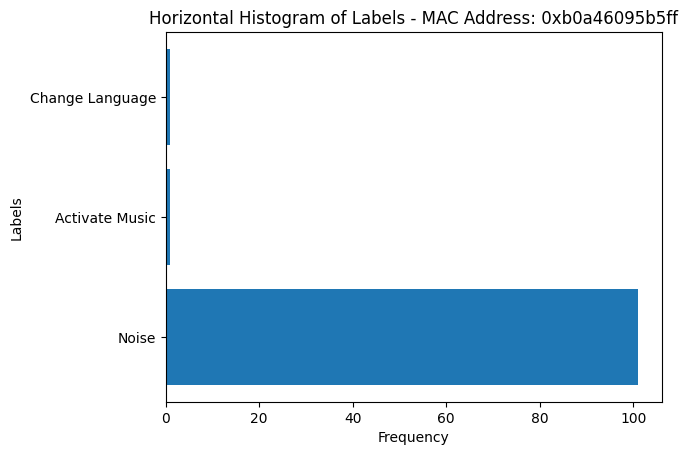

In [9]:
import matplotlib.pyplot as plt
import numpy as np

label_names = {
    0.0: 'Change Language',
    1.0: 'Activate Music',
    2.0: 'Deactivate Lights',
    3.0: 'Increase Volume',
    4.0: 'Decrease Volume',
    5.0: 'Increase Heat',
    6.0: 'Decrease Heat',
    7.0: 'Noise'
}

# Convert the 'Labels' column to the appropriate labels using 'map'
df_combined['Labels'] = df_combined['Labels'].astype(int).map(label_names)

# Iterate over unique MAC addresses and plot separately
mac_addresses = df_combined['MacAddress'].unique()

for mac_address in mac_addresses:
    df_mac = df_combined[df_combined['MacAddress'] == mac_address]

    label_counts = df_mac['Labels'].value_counts()

    plt.barh(label_counts.index, label_counts.values)

    plt.xlabel('Frequency')
    plt.ylabel('Labels')
    plt.title(f'Horizontal Histogram of Labels - MAC Address: {mac_address}')

    plt.show()
